### Tarea 7.2

Queremos encontrar los ceros de la función $f(x) = \sinh(x) - \cos(x)$. Para lograrlo, primero use algunas iteraciones del método de bisección y así obtener un punto inicial para el método de Newton.

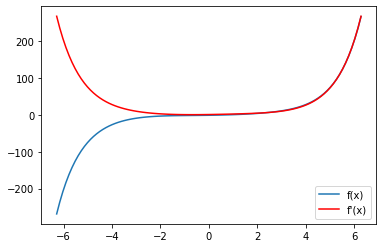

In [8]:
#Importamos los paquetes necesarios
import numpy as np
import matplotlib.pyplot as plt

#Definimos la función y su derivada
def f(x):
    return np.sinh(x) - np.cos(x)
def df(x):
    return np.cosh(x) + np.sin(x)
x = np.linspace(-2*np.pi,2*np.pi,100)
plt.plot(x,f(x),label="f(x)") #Ploteamos algunos puntos para ver el comportamiento de la función
plt.plot(x,df(x),label="f'(x)",color="red")
plt.legend()

In [26]:
#Definimos una función que realiza el metodo de bisección y el metodo de newton
class MaxIterations(Exception):
    pass

def biseccion(f, a, b, epsilon, N=1000000):
    """
    Aproxima el cero de una función utilizando el metodo de bisección.
    Parametros
    -----------
    f : function
        Función de entrada.
    a,b : float
        El cero de la función de entrada se estima que se encuentra 
        en el intervalo [a,b].
    epsilon : float
        Valor de error.
    N : int, optional
        Maximo de iteraciones del algoritmo.
    """
    p0 = a
    for i in range(N):
        p1 = a + (b - a)/2
        if abs(p0 - p1)/abs(p1) < epsilon:
            return p0
        elif f(p1)*f(a) > 0:
            a = p1
        else:
            b = p1
        p0 = p1
        
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")
    
def newton(f, df, po, epsilon, N=1000000):
    """
    Encuentra el cero de una función de entrada da un punto inicial 
    y su derivada.
    
    parametros
    ----------
    f : function
        Función de entrada.
    df : function
        Derivada de la función de entrada.
    po : float
        Valor inicial para el algoritmo.
    epsilon: float
        Error minimo.
    N : int , optional
        Número maximo de iteraciones.
    """
    for i in range(N):
        p = po - f(po)/df(po)
        if abs(p - po)/abs(p) < epsilon:
            return p
        
        po = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [55]:
a,b = -4,4.2; #Observando el grafico de la función podemos intuir estos valores
valor_inicial = biseccion(f,a,b,1e-12);
valor_inicial

0.7032906588632383

In [56]:
valor_newton = newton(f,df,valor_inicial,1e-12);

In [57]:
print(f'La diferencia entre el metodo de newton y de bisección es {abs(valor_newton-valor_inicial)}')

La diferencia entre el metodo de newton y de bisección es 7.271960811294775e-13


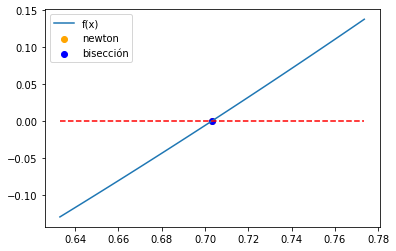

In [59]:
x = np.linspace(valor_newton-valor_newton/10,valor_newton+valor_newton/10,100)
plt.plot(x,f(x),label="f(x)")
plt.scatter(valor_newton,f(valor_newton),color="orange",label="newton");
plt.scatter(valor_newton,f(valor_inicial),color="blue",label="bisección");
plt.plot(x,np.full(len(x),0),linestyle='--',color="red")
plt.legend()

<IPython.core.display.Javascript object>


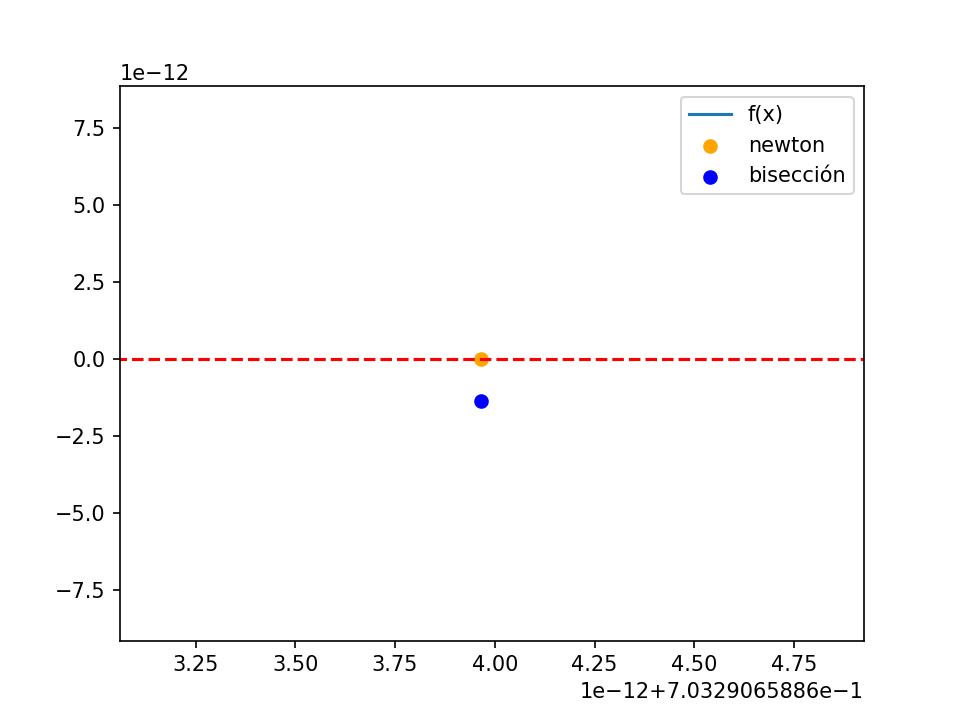

In [60]:
%matplotlib notebook
x = np.linspace(valor_newton-valor_newton/10,valor_newton+valor_newton/10,100)
plt.plot(x,f(x),label="f(x)")
plt.scatter(valor_newton,f(valor_newton),color="orange",label="newton");
plt.scatter(valor_newton,f(valor_inicial),color="blue",label="bisección");
plt.plot(x,np.full(len(x),0),linestyle='--',color="red")
plt.legend()

Con un acercamiento podemos ver que el metodo de newton es mejor buscando los ceros de la función que el metodo de bisección.

# Calificación: 7.0